<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_Ana_SKLearn_dez_06_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importa bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import optimize

In [2]:
#Clona a pasta do github
!git clone https://github.com/AnaSoldan/ANN

Cloning into 'ANN'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 4), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [3]:
#Direciona para a pasta ANN
%cd ANN

/content/ANN


In [4]:
#Exibe o conteudo da pasta
!ls

Dados_extracao.csv  Extracao.csv  README.md


In [5]:
#Salva os dados da planilha na variavel
DADOS=pd.read_csv("Extracao.csv")
print(DADOS.head())

   Run  Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0    1           80       200           0.50             10           5   
1    2           80       275           0.75             10           5   
2    3           60       350           0.75             10           5   
3    4           60       275           0.75             10           0   
4    5           80       275           1.00              5           5   

   Observed_yield  Predicted_yield  
0          0.1289           0.1331  
1          0.3470           0.3604  
2          0.3430           0.3400  
3          0.2500           0.2539  
4          0.3000           0.2988  


In [0]:
#Codificacao dos dados
def Codificacao(x):
  strings=list(x)
  for i in strings:
    x_max=x[i].max()
    x_min=x[i].min()
    a=(x_max+x_min)/2
    b=(x_max-x_min)/2
    x[i]=(x[i]-a)/b
  return x

In [7]:
#Seleciona as colunas de interesse
Colunas=[1,2,3,4,5,6]
Sel_dados=[]
Sel_dados=DADOS.iloc[:,Colunas].copy()
print(Sel_dados.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0           80       200           0.50             10           5   
1           80       275           0.75             10           5   
2           60       350           0.75             10           5   
3           60       275           0.75             10           0   
4           80       275           1.00              5           5   

   Observed_yield  
0          0.1289  
1          0.3470  
2          0.3430  
3          0.2500  
4          0.3000  


In [8]:
#Cria variavel de dados normatizados
Nor_dados=[]
Nor_dados=Codificacao(Sel_dados).copy()
print(Nor_dados.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0          0.0      -1.0           -1.0            0.0         0.0   
1          0.0       0.0            0.0            0.0         0.0   
2         -1.0       1.0            0.0            0.0         0.0   
3         -1.0       0.0            0.0            0.0        -1.0   
4          0.0       0.0            1.0           -1.0         0.0   

   Observed_yield  
0       -0.648603  
1        0.569832  
2        0.547486  
3        0.027933  
4        0.307263  


In [9]:
#Seleciona os dados de treino e validação
linhas_train=range(32)
linhas_val=[33,34,35,36,37,38]
linhas_test=[39,40,41,42,43,44,45]
Train=Nor_dados.iloc[linhas_train, :].copy()
Validation=Nor_dados.iloc[linhas_val,:].copy()
Test=Nor_dados.iloc[linhas_test, :].copy()
print(Train.head())
print(Validation.head())
print(Test.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
0          0.0      -1.0           -1.0            0.0         0.0   
1          0.0       0.0            0.0            0.0         0.0   
2         -1.0       1.0            0.0            0.0         0.0   
3         -1.0       0.0            0.0            0.0        -1.0   
4          0.0       0.0            1.0           -1.0         0.0   

   Observed_yield  
0       -0.648603  
1        0.569832  
2        0.547486  
3        0.027933  
4        0.307263  
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent  \
33          0.0       1.0            0.0           -1.0         0.0   
34          0.0       0.0            0.0           -1.0         1.0   
35          0.0       0.0            0.0            0.0         0.0   
36          0.0       1.0            1.0            0.0         0.0   
37          0.0       1.0           -1.0            0.0         0.0   

    Observed_yield  
33        0

In [10]:
#Seleciona as variáveis independentes
x_train=Train.iloc[:,[0,1,2,3,4]].copy()
x_val=Validation.iloc[:,[0,1,2,3,4]].copy()
x_test=Test.iloc[:,[0,1,2,3,4]].copy()
x_orig=DADOS.iloc[:,[1,2,3,4,5]].copy()
print(x_train.head())
print(x_val.head())
print(x_test.head())
print(x_orig.head())

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0          0.0      -1.0           -1.0            0.0         0.0
1          0.0       0.0            0.0            0.0         0.0
2         -1.0       1.0            0.0            0.0         0.0
3         -1.0       0.0            0.0            0.0        -1.0
4          0.0       0.0            1.0           -1.0         0.0
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
33          0.0       1.0            0.0           -1.0         0.0
34          0.0       0.0            0.0           -1.0         1.0
35          0.0       0.0            0.0            0.0         0.0
36          0.0       1.0            1.0            0.0         0.0
37          0.0       1.0           -1.0            0.0         0.0
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
39          0.0       0.0            0.0            1.0        -1.0
40         -1.0       0.0            1.0            0.

In [11]:
#Seleciona a variavel dependente
y_train=Train.iloc[:,[5]].copy()
y_val=Validation.iloc[:,[5]].copy()
y_test=Test.iloc[:,[5]].copy()
y_orig=DADOS.iloc[:,[6]].copy()
print(y_train.head())
print(y_val.head())
print(y_test)
print(y_orig.head())

   Observed_yield
0       -0.648603
1        0.569832
2        0.547486
3        0.027933
4        0.307263
    Observed_yield
33        0.754190
34        0.883240
35        0.729609
36        0.893855
37       -0.111732
    Observed_yield
39        0.000000
40        0.544693
41       -0.477654
42        0.754190
43       -0.237430
44        0.251397
45       -0.040782
   Observed_yield
0          0.1289
1          0.3470
2          0.3430
3          0.2500
4          0.3000


In [0]:
#Funcao que descodifica os dados
def Descodifica(x,x_old):
  strings=list(x)
  for i in strings:
    x_max=x_old[i].max()
    x_min=x_old[i].min()
    a=(x_max+x_min)/2
    b=(x_max-x_min)/2
    x[i]=x[i]*b+a
  return x

In [0]:
#Define a função Rede Neural que será testada em busca do melhor número de neuronios na camada oculta
def rede(i):
    clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(i),random_state=1)
    return clf

In [14]:
#Seleciona os dados observados
y_obs_train=Descodifica(y_train,y_orig).copy()
y_obs_val=Descodifica(y_val,y_orig).copy()
y_obs_test=Descodifica(y_test,y_orig).copy()
print(y_obs_train.head())
print(y_obs_val)
print(y_obs_test)

   Observed_yield
0          0.1289
1          0.3470
2          0.3430
3          0.2500
4          0.3000
    Observed_yield
33          0.3800
34          0.4031
35          0.3756
36          0.4050
37          0.2250
38          0.2626
    Observed_yield
39          0.2450
40          0.3425
41          0.1595
42          0.3800
43          0.2025
44          0.2900
45          0.2377


In [15]:
#Codifica os y de treino e teste
y_train=Codificacao(y_train)
y_val=Codificacao(y_val)
y_test=Codificacao(y_test)
print(y_train.head())
print(x_train.head())
print(y_obs_train.head())
print(y_test.head())
print(x_test.head())
print(y_obs_test.head())

   Observed_yield
0       -0.648603
1        0.569832
2        0.547486
3        0.027933
4        0.307263
   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0          0.0      -1.0           -1.0            0.0         0.0
1          0.0       0.0            0.0            0.0         0.0
2         -1.0       1.0            0.0            0.0         0.0
3         -1.0       0.0            0.0            0.0        -1.0
4          0.0       0.0            1.0           -1.0         0.0
   Observed_yield
0          0.1289
1          0.3470
2          0.3430
3          0.2500
4          0.3000
    Observed_yield
39       -0.224490
40        0.659864
41       -1.000000
42        1.000000
43       -0.609977
    Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
39          0.0       0.0            0.0            1.0        -1.0
40         -1.0       0.0            1.0            0.0         0.0
41          0.0       0.0            0.0           -1.0        -

In [16]:
M=10
Melhor=1e99
ir=0
for i in range(1,M):
  col_names=list(y_train)
  clf=rede(i)
  clf.fit(x_train, y_train)
  y_calc_train=[]
  y_calc_test=[]
  y_calc_train=clf.predict(x_train)
  y_calc_test=clf.predict(x_test)
  y_calc_train=pd.DataFrame(y_calc_train)
  y_calc_test=pd.DataFrame(y_calc_test)
  y_calc_train.columns = col_names
  y_calc_test.columns = col_names
  y_calc_train=Descodifica(y_calc_train,y_orig)
  y_calc_test=Descodifica(y_calc_test,y_orig)
  mse=mean_squared_error(y_obs_test,y_calc_test)
  R2=r2_score(y_obs_test,y_calc_test)
  print("Neuronios=",i,"MSE teste=",mse,"R^2 teste=",R2)
  if(mse<Melhor):
    Melhor=mse.copy()
    ix=i
    R2r=R2
    redem=clf
print("\n Melhor resposta:")
print("Neuronios=",ix,"MSE teste=",Melhor,"R^2 teste=",R2r)

Neuronios= 1 MSE teste= 0.0033485939628580858 R^2 teste= 0.34955931362301673
Neuronios= 2 MSE teste= 0.0009533922513454624 R^2 teste= 0.8148103003141199
Neuronios= 3 MSE teste= 0.004608858514471828 R^2 teste= 0.1047618406954326
Neuronios= 4 MSE teste= 0.0031072789433934755 R^2 teste= 0.39643304887865427


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neuronios= 5 MSE teste= 0.007525735714356281 R^2 teste= -0.46182091881921283
Neuronios= 6 MSE teste= 0.002013544036795823 R^2 teste= 0.6088833164395029
Neuronios= 7 MSE teste= 0.0008183914277267169 R^2 teste= 0.841033255187122
Neuronios= 8 MSE teste= 0.0005469637691353555 R^2 teste= 0.8937561575497531
Neuronios= 9 MSE teste= 0.0027102302652727748 R^2 teste= 0.4735569455309303

 Melhor resposta:
Neuronios= 8 MSE teste= 0.0005469637691353555 R^2 teste= 0.8937561575497531


In [17]:
# Calcula o y predito usando a rede neural
y_calc_train=redem.predict(x_train)
y_calc_val=redem.predict(x_val)
y_calc_test=redem.predict(x_test)
#Transforma os dados de volta para dataframe
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_val=pd.DataFrame(y_calc_val)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_val.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())
print(y_calc_val)
print(y_calc_test)

   Observed_yield
0       -0.648830
1        0.653146
2        0.548794
3        0.028142
4        0.312910
   Observed_yield
0        0.735578
1        0.733545
2        0.653146
3        0.829951
4        0.298586
5        0.139156
   Observed_yield
0        0.273103
1        0.586303
2       -0.382043
3        0.879019
4       -0.339257
5        0.181254
6       -0.097051


In [18]:
#Descodificacao dos dados calculados
y_calc_train_orig=Descodifica(y_calc_train,y_orig)
y_calc_val_orig=Descodifica(y_calc_val,y_orig)
y_calc_test_orig=Descodifica(y_calc_test, y_orig)
print(y_calc_train_orig.head())
print(y_calc_val_orig.head())
print(y_calc_test_orig.head())

   Observed_yield
0        0.128859
1        0.361913
2        0.343234
3        0.250037
4        0.301011
   Observed_yield
0        0.376668
1        0.376305
2        0.361913
3        0.393561
4        0.298447
   Observed_yield
0        0.293885
1        0.349948
2        0.176614
3        0.402344
4        0.184273


In [19]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 1.2670223084629656e-05
R^2 treino= 0.9984303718219377


In [20]:
mse=mean_squared_error(y_obs_val,y_calc_val)
print("MSE Validation=",mse)
R2=r2_score(y_obs_val,y_calc_val)
print("R^2 Validation=",R2)

MSE Validation= 0.001082523242958008
R^2 Validation= 0.7854155130048331


In [21]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.0005469637691353555
R^2 teste= 0.8937561575497531


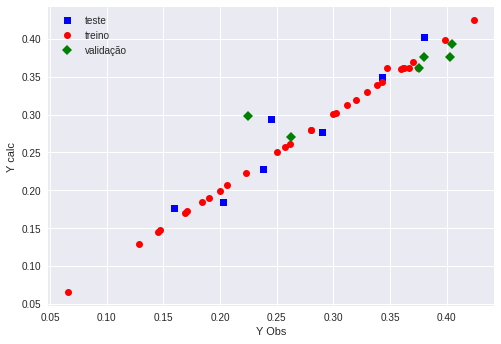

In [22]:
#Plota o gráfico
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)


plt.plot(y_obs_test,y_calc_test_orig, marker="s",linestyle = 'None', c='b', label='teste') #c=cor marker=tipo do marcador(aqui s significa square)
plt.plot(y_obs_train,y_calc_train_orig, marker="o",linestyle = 'None', c='r', label='treino')
plt.plot(y_obs_val,y_calc_val_orig, marker="D",linestyle = 'None', c='g', label='validação')


plt.legend(loc='upper left')
plt.ylabel('Y calc')
plt.xlabel('Y Obs')
plt.show()

In [0]:
def function(x):
  global clf
  x=x.reshape((1, 5))
  df = pd.DataFrame(x)
  Y=redem.predict(df)
  fun=Y*(-1)
  return fun

In [24]:
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2),(-2, 2)]

Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 5))
Condicoes.columns=['Temperature', 'Pressure','Particle_size','Flow_rate-CO2','Co-solvent']
print(Condicoes)
Cond=Descodifica(Condicoes, x_orig)
print(Cond)

   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0     0.881245       2.0            2.0      -1.144073         2.0
   Temperature  Pressure  Particle_size  Flow_rate-CO2  Co-solvent
0    97.624893     425.0           1.25       4.279636        15.0
